In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


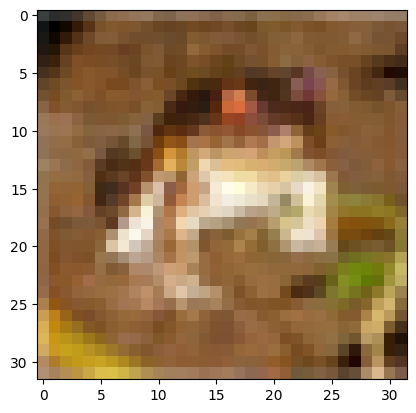

In [3]:
plt.imshow(X_train[0])

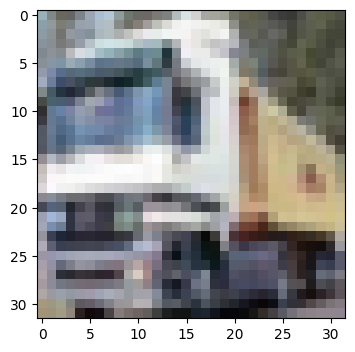

In [4]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[1])

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)


In [7]:
classes = ['airplain', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

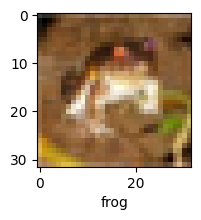

In [9]:
plot_sample(X_train, y_train, 0)

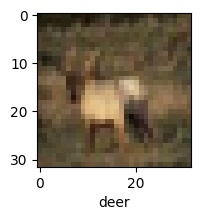

In [10]:
plot_sample(X_train, y_train, 3)

preprocessing: scale images


In [11]:
X_train = X_train/255
X_test = X_test/255

data augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


cnn model

In [13]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  # Added another convolutional layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Increased the number of neurons
    layers.Dropout(0.25),  # Added dropout for regularization
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compiling

In [14]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

training the model with using data generator

In [15]:
cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 83ms/step - accuracy: 0.2765 - loss: 1.9241
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 77ms/step - accuracy: 0.4788 - loss: 1.4231
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 65ms/step - accuracy: 0.5470 - loss: 1.2653
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 67ms/step - accuracy: 0.5827 - loss: 1.1763
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.6076 - loss: 1.1091
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6231 - loss: 1.0723
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 65ms/step - accuracy: 0.6451 - loss: 1.0117
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.6601 - loss: 0.9723
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6640 - loss: 0.9540
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6831 - loss: 0.9028


evaluation

In [16]:
cnn.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7219 - loss: 0.8090


[0.8103135228157043, 0.7246000170707703]

generating predictions and classification report

In [17]:
from sklearn.metrics import classification_report

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.82      0.87      0.85      1000
           2       0.69      0.57      0.63      1000
           3       0.56      0.50      0.53      1000
           4       0.74      0.59      0.66      1000
           5       0.64      0.66      0.65      1000
           6       0.80      0.79      0.79      1000
           7       0.70      0.80      0.74      1000
           8       0.80      0.85      0.82      1000
           9       0.71      0.87      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



functioning to plot a sample

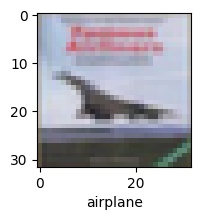

In [19]:
def plot_sample(X, y, index):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]]) # Access the integer value within the array

#usage:
plot_sample(X_test, y_test, 3)